In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data\\train.csv")

Każdy rysunek składa się z 784 pikseli: 28 x 28

In [4]:
df.shape

(42000, 785)

In [5]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's analyze data one more time.

In [6]:
def plot_avg_digit(df, rows=4, cols=3):
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,8))

    i = 0
    for r in list(range(rows)):
        for c in list(range(cols)):
            arr = df[df["label"] == i].iloc[:,1:].mean().to_numpy().reshape((28,28))
            if np.all(np.isnan(arr)):
                i += 1
                fig.delaxes(ax[r,c])
                continue
            ax[r, c].imshow(arr, cmap="Greys")
            ax[r, c].set_title(i)
            i += 1


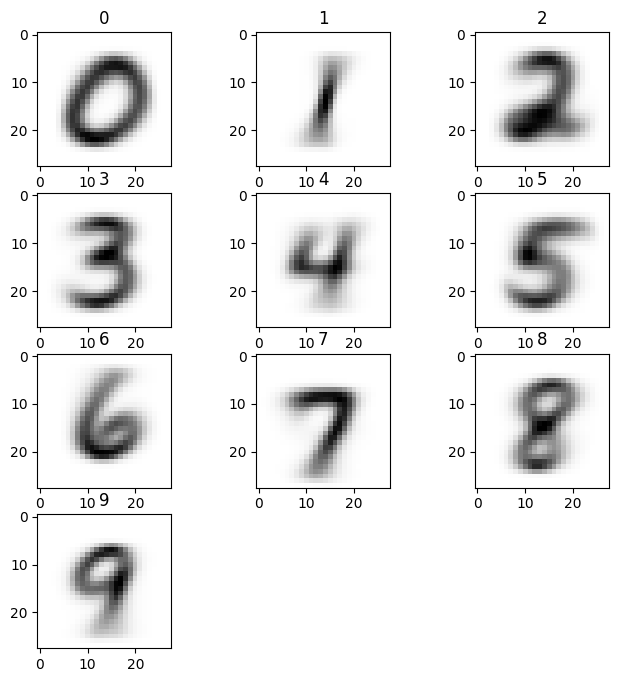

In [7]:
plot_avg_digit(df)

It seems, that all digits are concentrated in similar positions on this 28x28 grid. Therefore, I think that creating copy with bigger and smaller digits could improve this set.

Some digits, like 1 and 4 seem to be skewed to the right often. I think I could create copies of them, that will be rotated to the left little bit.

Digit 7 seems to be drawed usually not in the centre of grid, but slightly lower. I think I could shift it little up

### Confusion matrix

I would like to analyze confusion matrix once again. To do this I'll train models once again.

In [14]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [10]:
seed = 0
X = df.iloc[:, 1:].copy().values
y = df['label'].copy().values

X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)

#### KNN

In [15]:
knn = KNeighborsClassifier(metric="minkowski", n_neighbors=5, weights="distance")
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [16]:
knn.score(X_val, y_val)

0.9703571428571428

#### SVC

In [17]:
svc = SVC(C=0.1, gamma=1, kernel="poly")
svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [18]:
svc.score(X_val, y_val)

0.974047619047619

Confusion matrices

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [26]:
y_pred = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

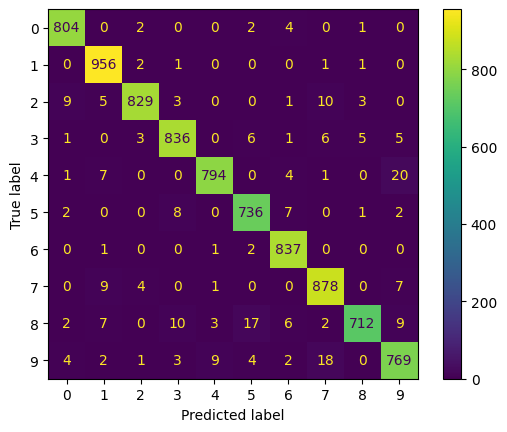

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [29]:
y_pred = svc.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

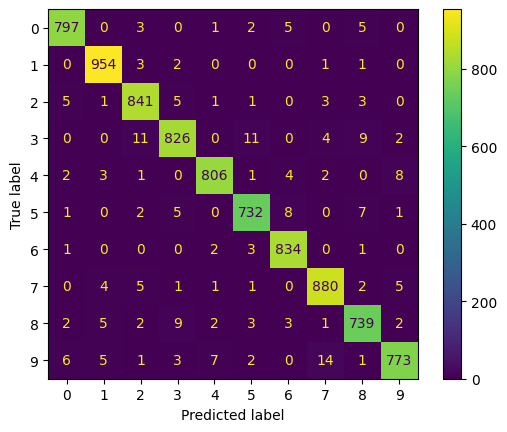

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()

In [42]:
import math

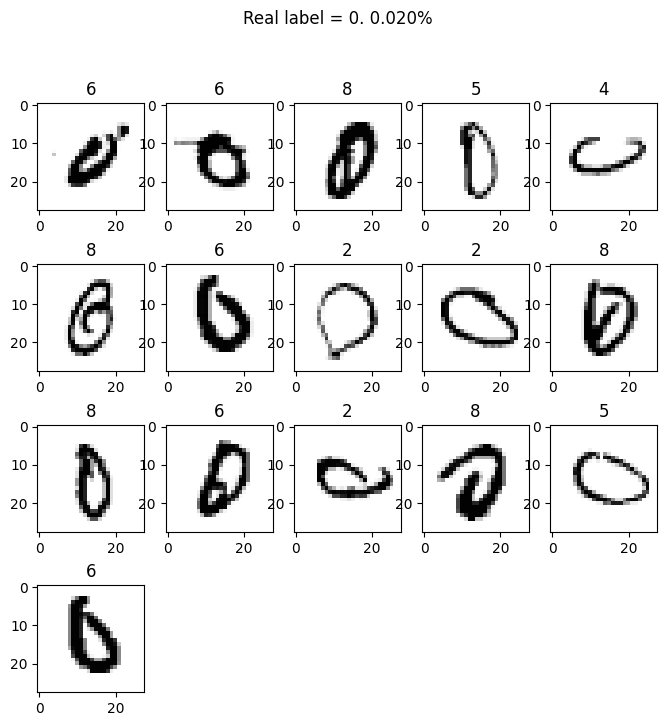

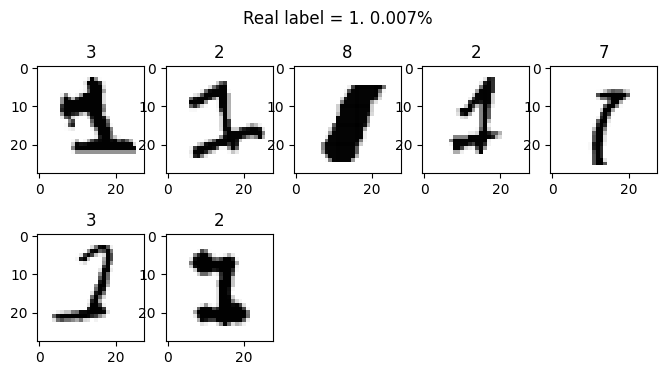

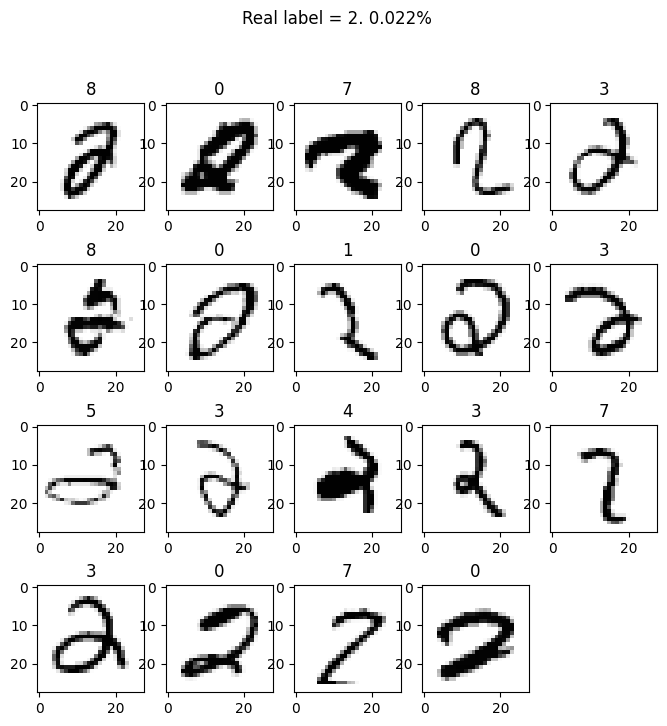

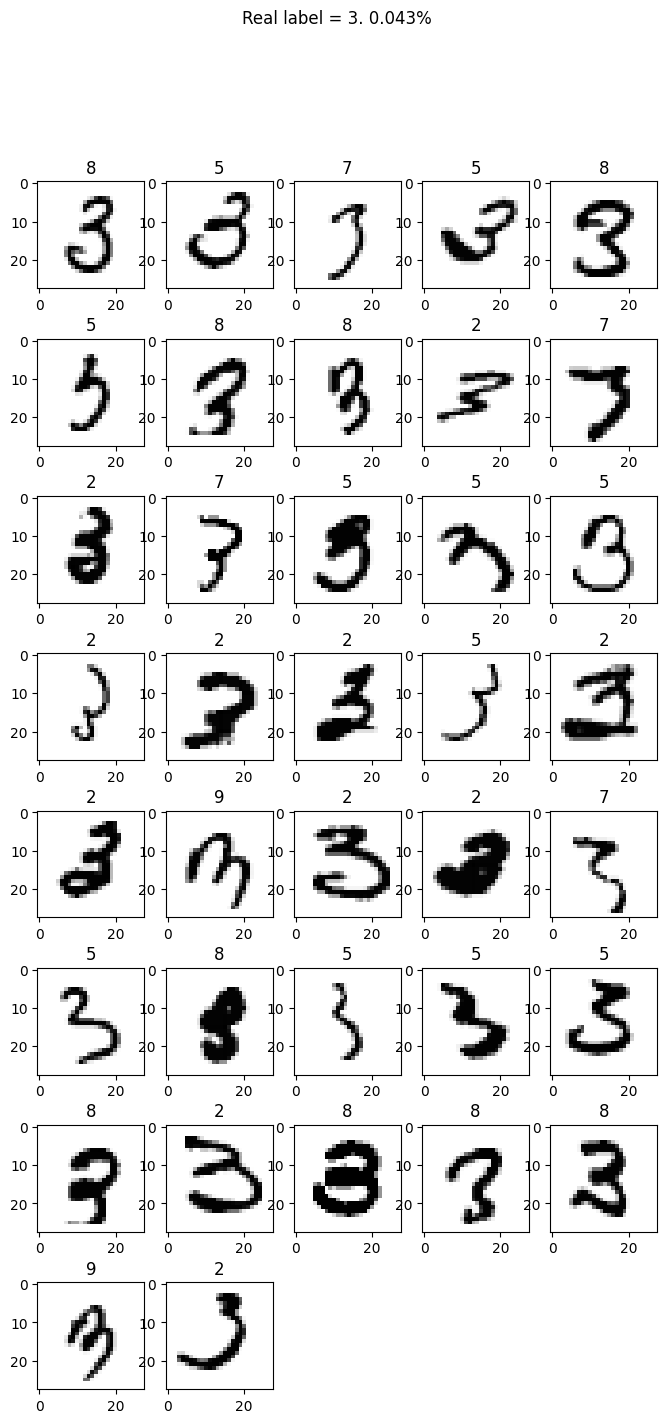

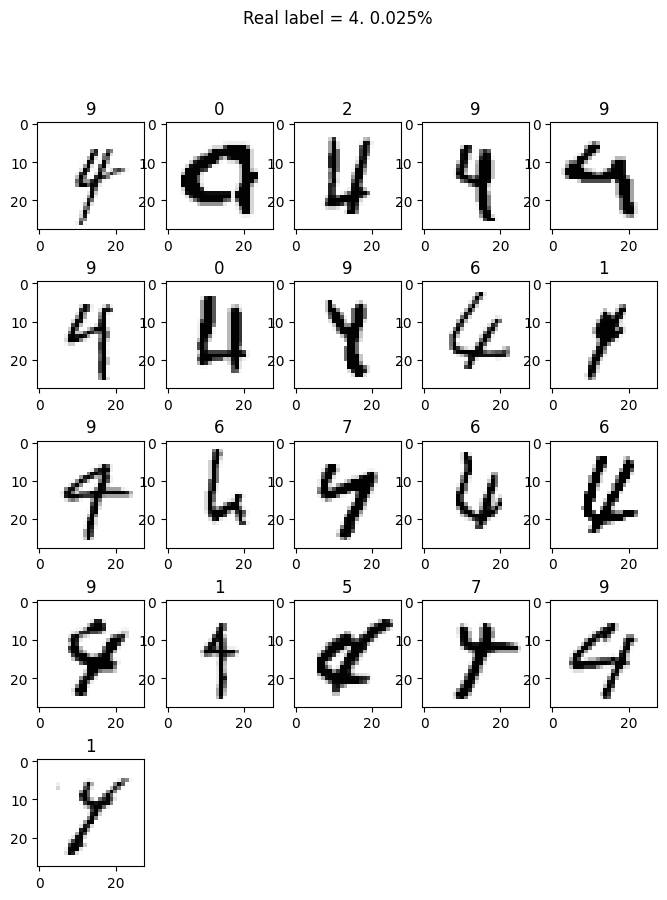

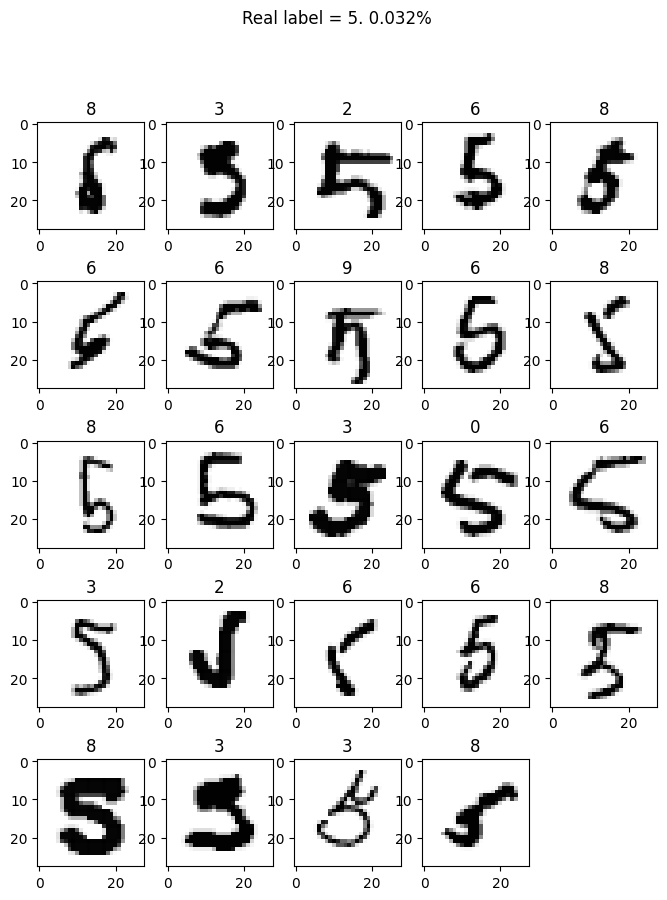

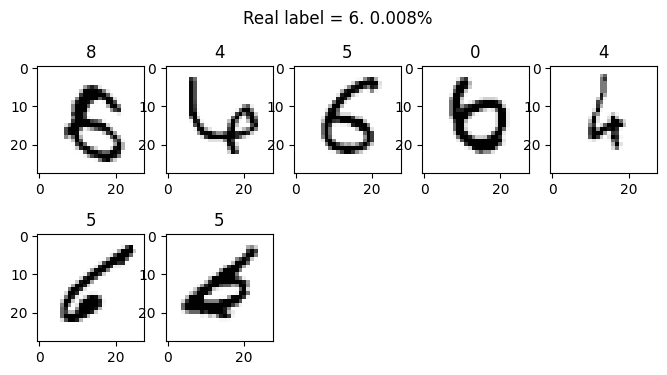

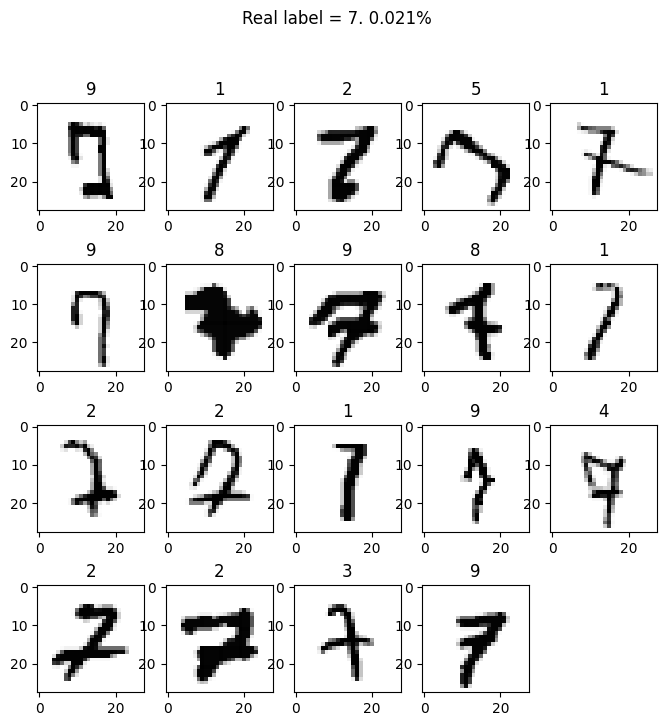

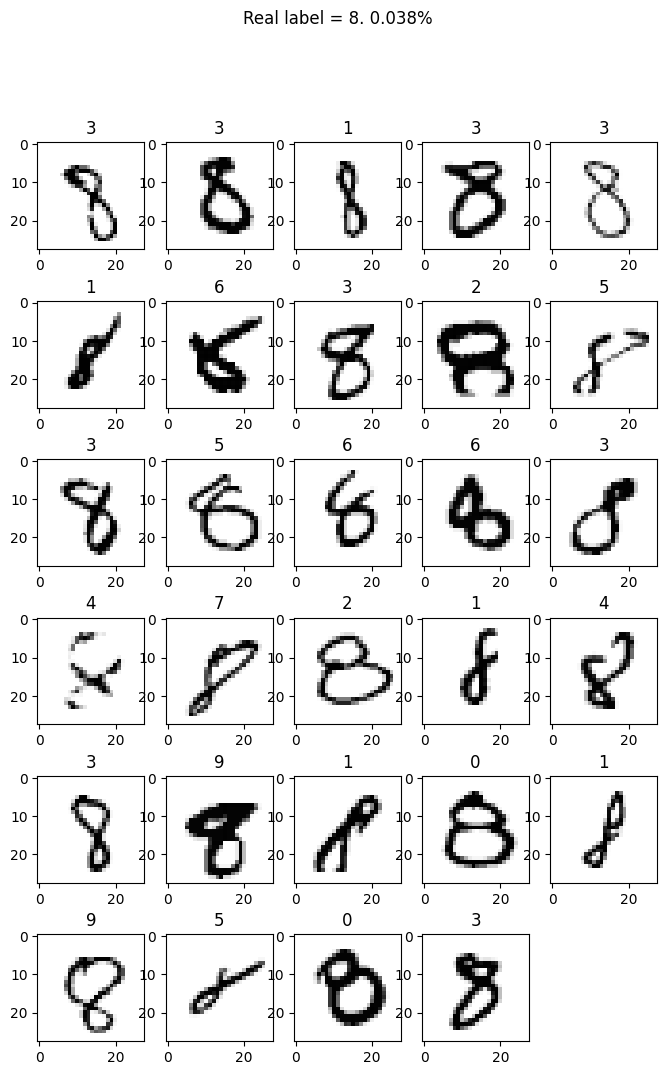

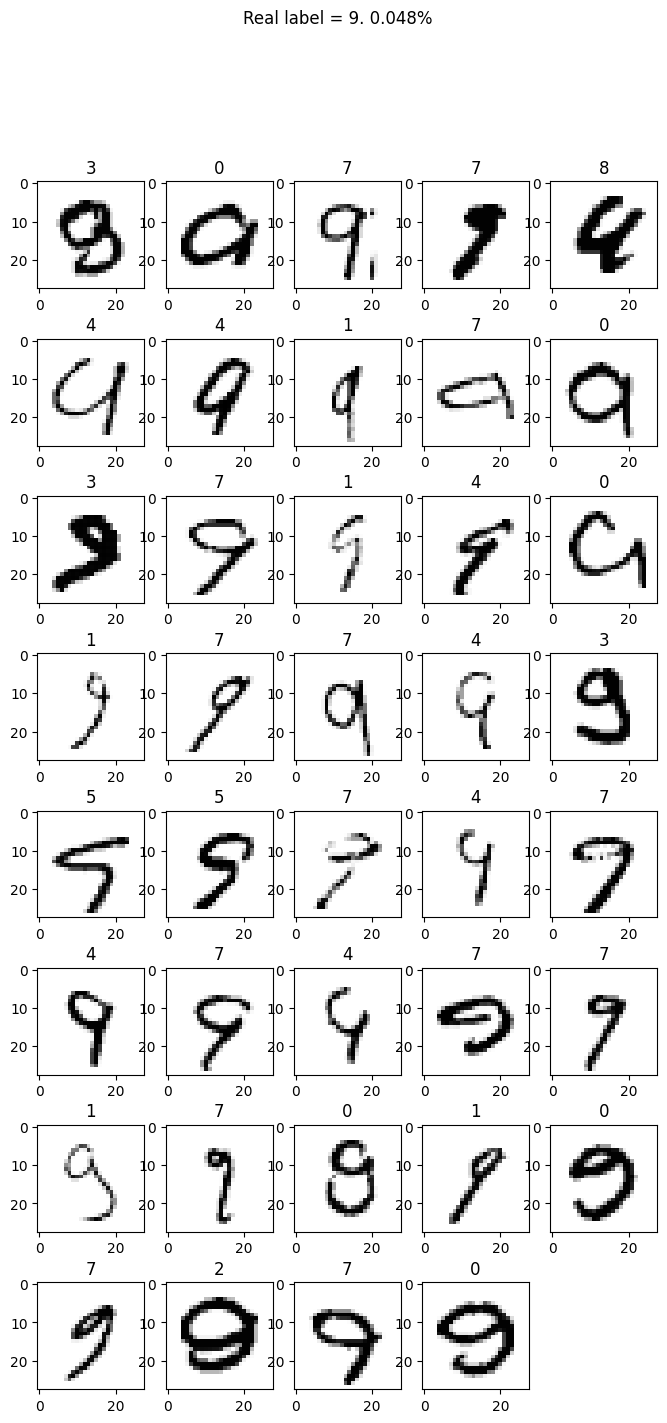

In [62]:
classes = svc.classes_
cols = 5

for c in classes:
    wrong = X_val[(y_pred != y_val) & (y_val == c)]
    wrong_labels = y_pred[(y_pred != y_val) & (y_val == c)]

    wrong_n = wrong.shape[0]
    all_n = X_val[(y_val == c)].shape[0]
    
    rows = math.ceil(wrong_n / cols)
    figsize = (8,2*rows)

    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
    if len(ax.shape) == 1:
        ax.reshape(ax.shape,1)


    fig.suptitle(f"Real label = {c}. {(wrong_n/all_n):.3f}%")
    i = 0
    for r in list(range(rows)):
        for c in list(range(cols)):
            if i >= wrong_n:
                i += 1
                fig.delaxes(ax[r,c])
                continue
            ax[r, c].imshow(wrong[i].reshape((28, 28)), cmap="Greys")
            ax[r, c].set_title(wrong_labels[i])
            i += 1


More 3, 4, 5, 6, 7, 8, 9

In [41]:
X_val[(y_pred != y_val) & (y_val == 0)].shape

(16, 784)